# TOOLBOX

In [4]:
# from Tools.DataTools import onehotcoding_string, onehotcoding, clean_dataset,load_dataset, ReSamplingData, path_to_tensor, paths_to_tensor
# from Tools.PlotTools import Plot_disease_count, Plot_image_check, plot_model_history, Classification_ROC_Report, Plot_predict
# from Tools.ModelTools import model_training, HistoryTraining_Save
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import sys
# print(sys.version, sys.platform, sys.executable)
# from Tools.tqdm import tqdm
# from tqdm import tqdm
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import os
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from keras.preprocessing import image                  
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from keras import backend as K 
K.tensorflow_backend._get_available_gpus() 
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8157263819596942955
]


In [10]:
from tensorflow.keras import backend
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import os
import cv2
# from tqdm import tqdm
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from keras.preprocessing import image                  
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

def onehotcoding_string(Y):
    # Convert ['CNV','DME','DRUSEN','NORMAL'] --> [0,1,2,3]
    encoder = LabelBinarizer()
    transfomed_label = encoder.fit_transform(Y)
    return Y

def onehotcoding(Y):
    # Convert [0,1,2,3] -->  [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
    Y_Hot = to_categorical(Y, num_classes = 4)
    return Y_Hot

def clean_dataset(X,Y):
    # Keep jpeg files only
    X_Clean=[]
    Y_Clean=[]
    for i, x in (enumerate(X)):
        if (".jpeg") in x:
            X_Clean.append(x)
            Y_Clean.append(Y[i]) 
    return np.array(X_Clean), np.array(Y_Clean)

def load_dataset(path):
    # Load files path in 'data'
    print('Read Folder : ',path)
    data = load_files(path)
    # Save filenames and target
    data_file_list = np.array(data['filenames'])
    data_target = np.array(data['target'])
    data_target_names = np.array(data['target_names'])
    # Clean dataset
    data_file_list, data_target = clean_dataset(data_file_list, data_target)
    # Get list of unique elements
    data_filesize_list = GetList_Image_Size(data_file_list)
    return data_file_list, data_target, data_target_names, data_filesize_list

def GetList_Image_Size(X_Data):
    # Count number identical image size
    # Dictionnary format
    X_Data_size=[]
    for path in X_Data:
        img=image.load_img(path)
        width, height=img.size
        X_Data_size.append(str(width) + 'x' + str(height))
    return Counter(X_Data_size)

def Plot_filesize_list(X,title):
    plt.bar(*zip(*X.items()))
    plt.xlabel('Image Size')
    plt.ylabel('Number of images')
    # plt.grid()
    plt.title(title)
    plt.show()
    return

    
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(350, 350))
    # convert PIL.Image.Image type to 3D tensor with shape (350, 350, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 350, 350, 3) and return 4D tensor
    x = np.expand_dims(x, axis=0)
    # convert 
    x = preprocess_input(x)
    return x

def paths_to_tensor(img_paths):
    # List files for loading and reshaping
    list_of_tensors = [path_to_tensor(img_path) for img_path in (img_paths)] 
    return np.vstack(list_of_tensors)

def Plot_PixelIntensity(X):
    # Plot picture and pixel intensity histogram associated
    fig = plt.figure(figsize=(20,20))   
    for i in range(2,12,2):
        # Picture
        img = cv2.imread(X[i])
        ax = fig.add_subplot(5, 2, i - 1, xticks=[], yticks=[])
        ax.imshow(img)
        # Pixel Intensity Plot
        ax = fig.add_subplot(5, 2, i)
        ax.hist(img.ravel(),256,[0,256])
        ax.set_ylabel('Number of pixels')
        ax.set_xlabel('Pixel value')
    plt.show()    
    return

def Plot_disease_count(Y,Y_names,title):
    """
    Plot Count target label
    Input Data : Y,Y_names,title --> Y_train,Y_names_train, comments
    """
    YList=Counter(Y)
    plt.bar(*zip(*YList.items()))
    plt.xlabel('Image Size')
    plt.ylabel('Number of images')
    plt.xticks(np.arange(len(Y_names)),Y_names)
    # plt.grid()
    plt.title(title)
    plt.show()

    
    

# DataSet Analysis

## Load images folder 

In [6]:
#------------------------
# Get files path and target label for classification
X_train_init, Y_train_init, Y_names_train, X_filesize_train=load_dataset('../OCT2017/train')
X_test_init, Y_test_init, Y_names_test, X_filesize_test=load_dataset('../OCT2017/test')
X_val, Y_val, Y_names_val, X_filesize_val=load_dataset('../OCT2017/val')
# Split training dataset
X_train, X_train1, Y_train, Y_train1 = train_test_split(X_train_init, Y_train_init, test_size=0.95) # Re-comment 
X_test, Y_test = X_test_init, Y_test_init

print('X_train : ',X_train.shape, 'Cases', X_filesize_train)
print('X_test : ',X_test.shape, 'Cases', X_filesize_test)
print('X_val : ',X_val.shape, 'Cases', X_filesize_val)
print('Y_train : ',Y_train.shape, 'Cases')
print('Y_test : ',Y_test.shape, 'Cases')
print('Y_val : ',Y_val.shape, 'Cases')


Read Folder :  ../OCT2017/train
Read Folder :  ../OCT2017/test
Read Folder :  ../OCT2017/val
X_train :  (4174,) Cases Counter({'512x496': 37892, '768x496': 21485, '512x512': 15456, '1536x496': 8361, '1024x496': 274, '384x496': 16})
X_test :  (968,) Cases Counter({'512x496': 745, '768x496': 222, '1536x496': 1})
X_val :  (32,) Cases Counter({'512x496': 24, '768x496': 8})
Y_train :  (4174,) Cases
Y_test :  (968,) Cases
Y_val :  (32,) Cases


## Number of images per diseases

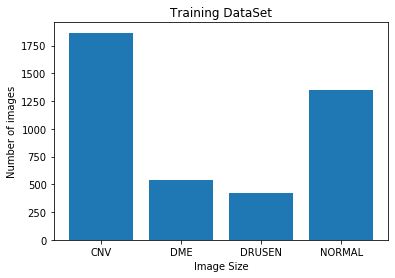

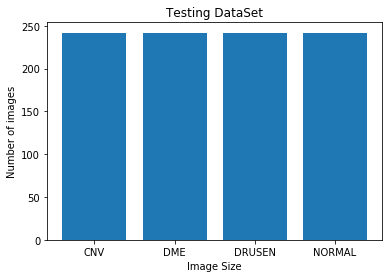

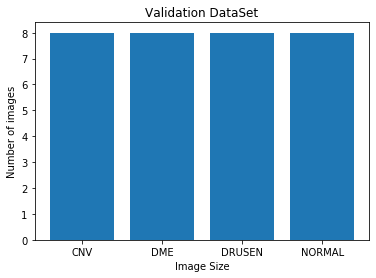

In [7]:
#------------------------
# PLOT NUMBER OF DISEASE PER DATASET
Plot_disease_count(Y_train,Y_names_train,'Training DataSet')
Plot_disease_count(Y_test,Y_names_test,'Testing DataSet')
Plot_disease_count(Y_val,Y_names_val,'Validation DataSet')


## Image size classification

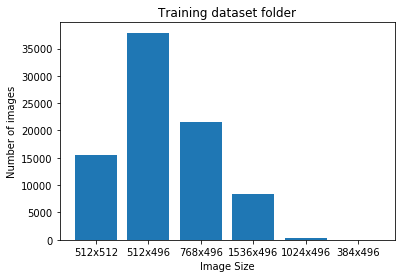

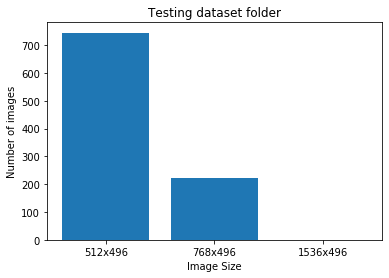

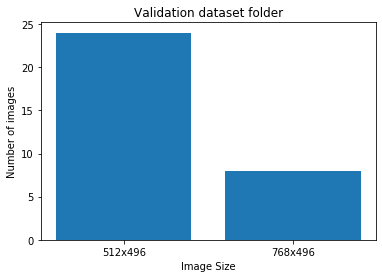

In [8]:
# Count number of images per sizing
Plot_filesize_list(X_filesize_train,'Training dataset folder')
Plot_filesize_list(X_filesize_test,'Testing dataset folder')
Plot_filesize_list(X_filesize_val,'Validation dataset folder')


## Pixel Intensity

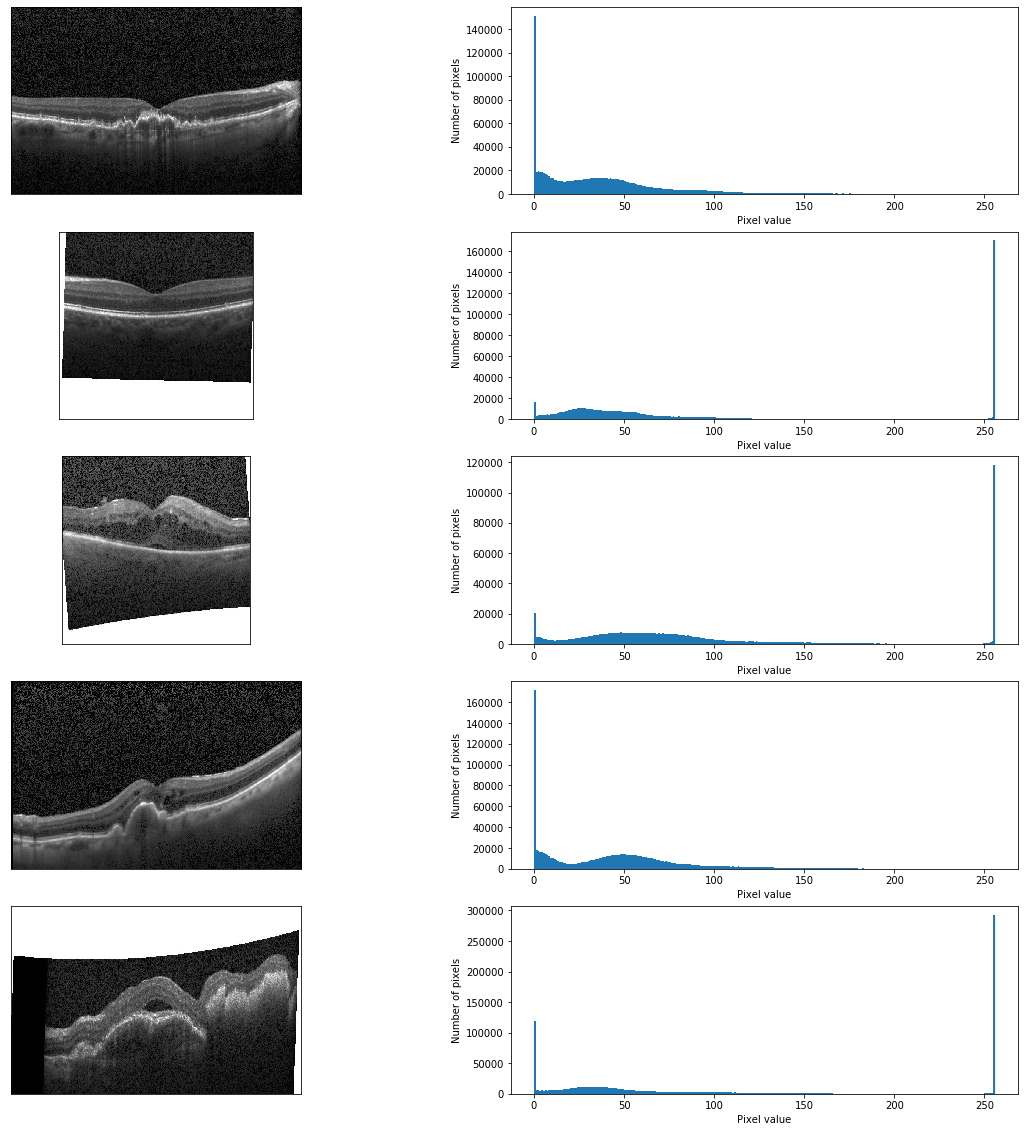

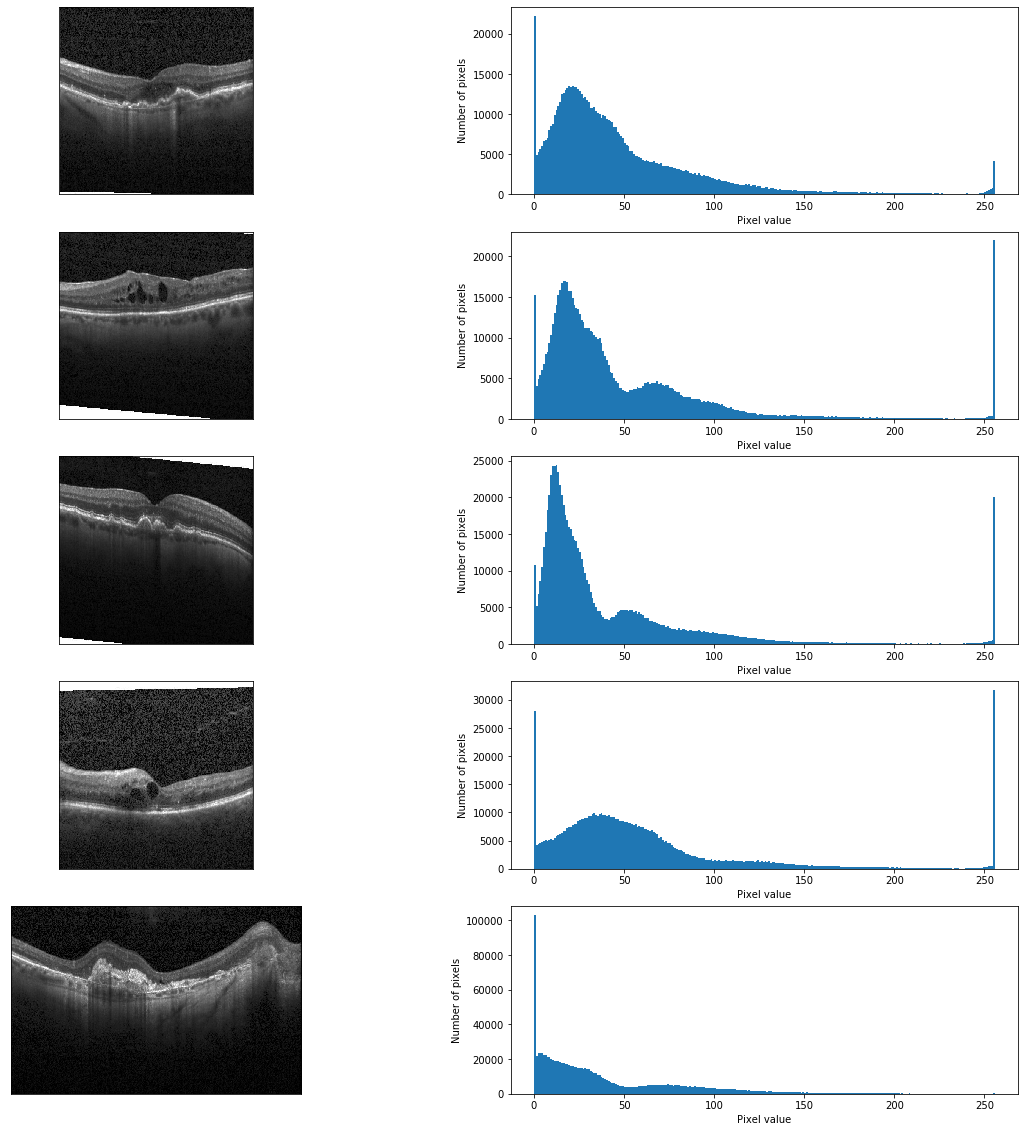

In [12]:
# Plot picture with its pixel intensity histogram
Plot_PixelIntensity(X_train)

Plot_PixelIntensity(X_test)

# Pre Process

## Convert paths to tensor

In [13]:
#------------------------
# Convert image data to tensorflow format
X_train_transform = paths_to_tensor(X_train).astype('float32')
Y_train_transform = onehotcoding(Y_train)
X_test_transform = paths_to_tensor(X_test).astype('float32')
Y_test_transform = onehotcoding(Y_test)
X_valid = paths_to_tensor(X_val).astype('float32')
Y_valid = onehotcoding(Y_val)

## Data Augmentation

In [14]:
# create and configure augmented image generator
# Training dataset
datagen_train = ImageDataGenerator(
        featurewise_center=True, 
        featurewise_std_normalization=True,
#         rescale=1/255.,
        rotation_range=20.,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') 
datagen_train.fit(X_train_transform)
print('datagen_train fit Done')
#
# Testing dataset
datagen_test = ImageDataGenerator(
#         rescale=1/255.)
        featurewise_center=True, 
        featurewise_std_normalization=True)
datagen_test.fit(X_test_transform)
print('datagen_test fit Done')

# training_generator = datagen_train.flow_from_directory(
#         '../OCT2017/train',
#         target_size=(350, 350),
#         batch_size=32,
#         class_mode='categorical',
#         shuffle=True)

# testing_generator = datagen_test.flow_from_directory(
#         '../OCT2017/test',
#         target_size=(350, 350),
#         batch_size=32,
#         class_mode='categorical',
#         shuffle=True)

# train_generator.
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=50,
#         validation_data=testing_generator,
#         validation_steps=800)

datagen_train fit Done
datagen_test fit Done


## Plot Image Augmentation 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

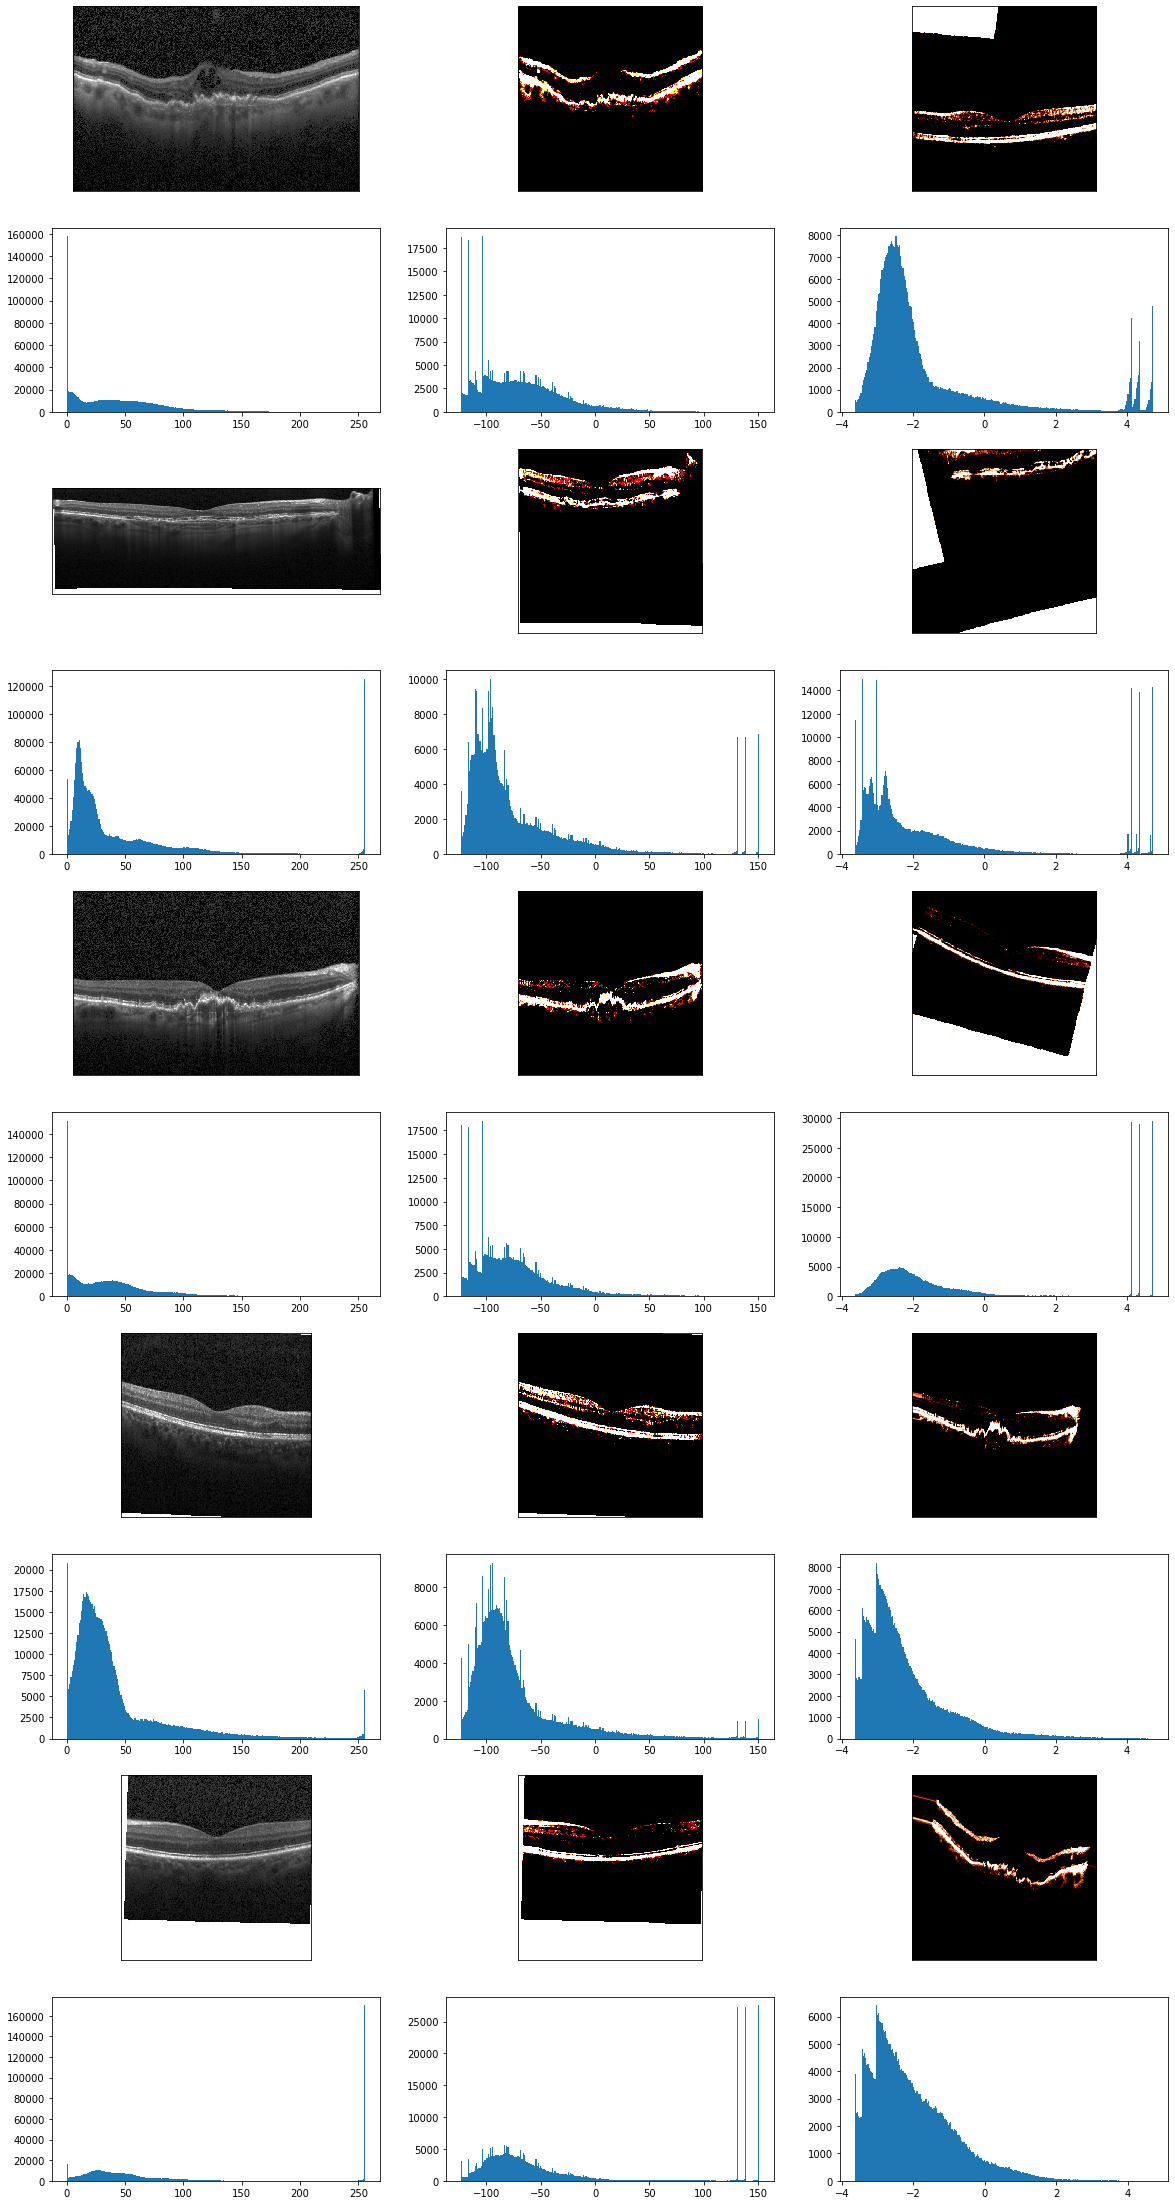

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

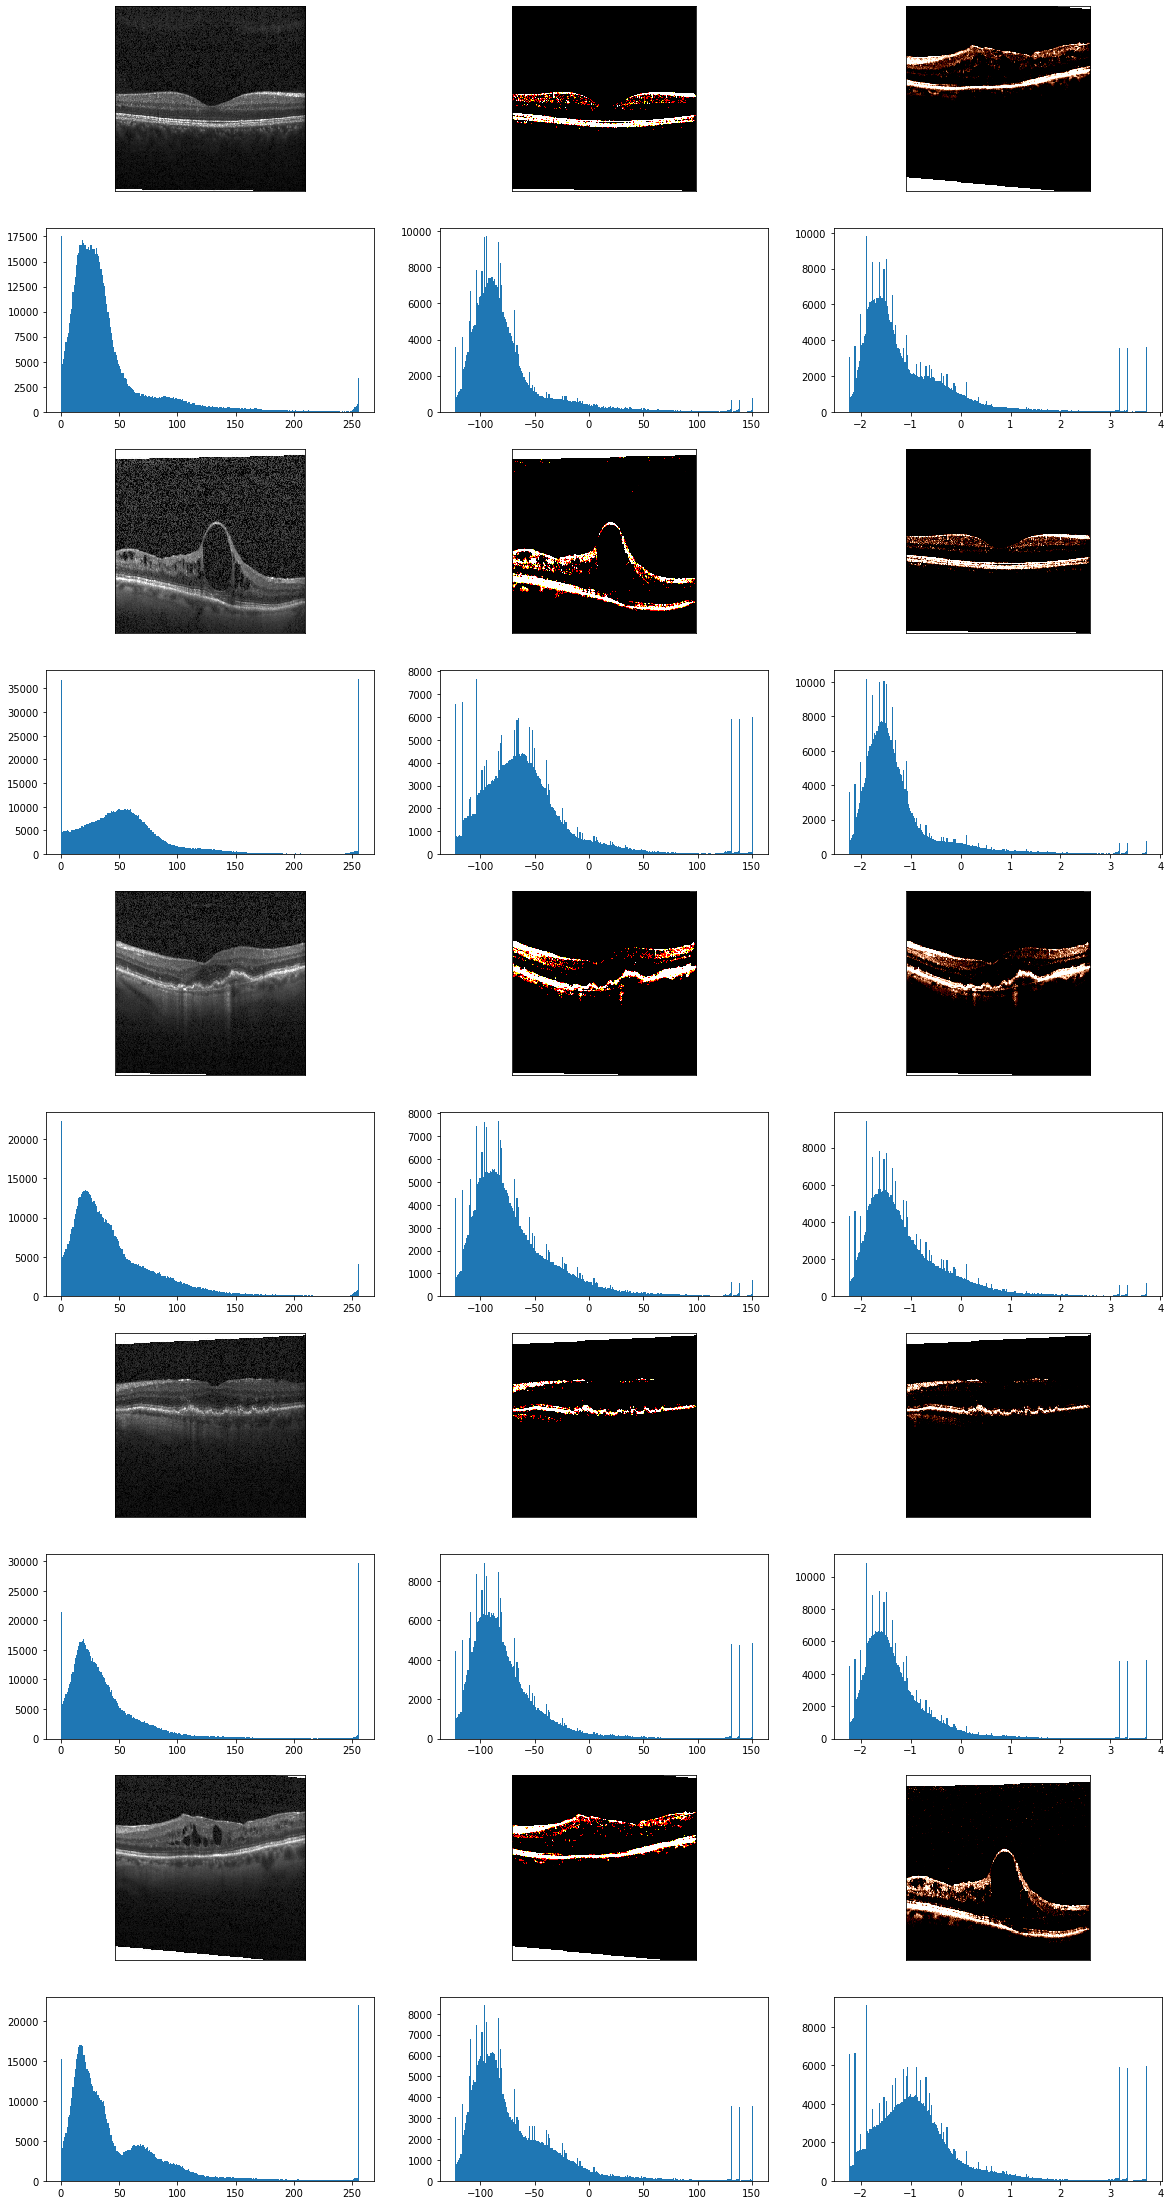

In [35]:
def Plot_image_check(X,X_path,datagen):
    """
    Plot raw images Vs preprocessed images
    Input Data : X,X_path,datagen --> Preprocessed images data, images files path, data generator for augmentation
    """
    # take subset of training data
    X_subset = X[:5]
    # visualize augmented images
    fig = plt.figure(figsize=(20,40))
    for x_batch in datagen.flow(X_subset, batch_size=32):
        for j in np.arange(len(X_subset)):
#             img = image.load_img(X_path[j], target_size=(350, 350))
            img = cv2.imread(X_path[j])
            ax = fig.add_subplot(len(X_subset)*2, 3, 6*j+1, xticks=[], yticks=[])
            ax.imshow(img)
#             print(np.max(img),np.min(img))
            ax = fig.add_subplot(len(X_subset)*2, 3, 6*j+2, xticks=[], yticks=[])
            img1=X_subset[j]
            ax.imshow(img1)
#             print(np.max(img1),np.min(img1))            
            img2=x_batch[j]
            ax = fig.add_subplot(len(X_subset)*2, 3, 6*j+3, xticks=[], yticks=[])
            ax.imshow(img2)
#             print(np.max(img2),np.min(img2))
            
            ax = fig.add_subplot(len(X_subset)*2, 3, 6*j+4)
            ax.hist(img.ravel(),256,[0,256])
            ax = fig.add_subplot(len(X_subset)*2, 3, 6*j+5)
            ax.hist(img1.ravel(),256,[np.min(img1),np.max(img1)])
            ax = fig.add_subplot(len(X_subset)*2, 3, 6*j+6)
            ax.hist(img2.ravel(),256,[np.min(img2),np.max(img2)])
            
#         fig.suptitle('Image : RAW Vs Path To Tensor Vs Augmented', fontsize=10)
        
        plt.show()
        break
#------------------------
# PLOT AUGMENTATION
Plot_image_check(X_train_transform,X_train,datagen_train)
Plot_image_check(X_test_transform,X_test,datagen_test)

# SQUEEZENET

## Build Model 

In [37]:

# from keras_squeezenet import SqueezeNet
from keras.engine import InputLayer
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Conv2D, MaxPooling2D, Convolution2D, AveragePooling2D, Activation, Concatenate
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Flatten, Dense, merge
import keras
from keras.callbacks import ModelCheckpoint
import pandas as pd
from keras.applications import VGG16
from keras_applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, warnings, Add
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.models import Model
from keras.engine.topology import get_source_inputs
from keras.utils import get_file
from keras.utils import layer_utils 

def fire_module(x, fire_id, squeeze=16, expand=64, use_bypass=False):
    """
    Fire Module
    Input data : 
        x          -> output of the previous layer
        fire_id    -> fire identification
        squeeze    -> number of filters in squeeze layer
        expand     -> number of filters in expand layer
        use_bypass -> By pass activation
        
    Output data : 
        x_sqn      -> output of the model with fire module added
    """
    sq1x1 = "squeeze1x1"
    exp1x1 = "expand1x1"
    exp3x3 = "expand3x3"
    relu = "relu_"

    s_id = 'fire' + str(fire_id) + '/'

    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = 3
    
    x_sqn = Convolution2D(squeeze, (1, 1), padding='valid', name=s_id + sq1x1, kernel_initializer='he_normal')(x)
    x_sqn = Activation('relu', name=s_id + relu + sq1x1)(x_sqn)

    left = Convolution2D(expand, (1, 1), padding='valid', name=s_id + exp1x1, kernel_initializer='he_normal')(x_sqn)
    left = Activation('relu', name=s_id + relu + exp1x1)(left)

    right = Convolution2D(expand, (3, 3), padding='same', name=s_id + exp3x3, kernel_initializer='he_normal')(x_sqn)
    right = Activation('relu', name=s_id + relu + exp3x3)(right)

    x_sqn = concatenate([left, right], axis=channel_axis, name=s_id + 'concat')
    
    if use_bypass:
        x_sqn = Add(name='Bypass' + s_id)([x_sqn, x])
    
    return x_sqn

def SqueezeNet_InitRandomWeight_ByPass_Model(Model_Name,use_bypass):
    """
    SqueezeNet model from scratch. 
    Input data : 
        Model_Name -> Name of the model for saving
        use_bypass -> True for By pass activation

    Output data :
        callbacks  -> Training parameters settings
        model      -> SqueezeNet model built
    """
    #------------------------------------
    # Load squeezenet model 
    print('-----------------------------------------------------------')
    print('------------------Import SqueezeNet Model------------------')
    print('-----------------------------------------------------------','\n')
    # def SqueezeNet(nb_classes, inputs=(height, width, 3)): # 3 is the number of input channels in this case
    nb_classes = 4
    input_shape = _obtain_input_shape((350, 350, 3),
                                      default_size=350,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=True)
    input_tensor=None
    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    x = Convolution2D(64, (3, 3), strides=(2, 2), padding='valid', name='conv1', kernel_initializer='he_normal')(img_input)
    x = Activation('relu', name='relu_conv1')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1')(x)

    x = fire_module(x, fire_id=2, squeeze=16, expand=96)
    x = fire_module(x, fire_id=3, squeeze=16, expand=96, use_bypass=use_bypass)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3')(x)

    x = fire_module(x, fire_id=4, squeeze=32, expand=128)
    x = fire_module(x, fire_id=5, squeeze=32, expand=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool5')(x)

    x = fire_module(x, fire_id=6, squeeze=48, expand=192)
    x = fire_module(x, fire_id=7, squeeze=48, expand=192, use_bypass=use_bypass)
    x = fire_module(x, fire_id=8, squeeze=64, expand=256)
    x = fire_module(x, fire_id=9, squeeze=64, expand=256, use_bypass=use_bypass)
    x = Dropout(0.5, name='drop9')(x)

    x = Convolution2D(nb_classes, (1, 1), padding='valid', name='conv10', kernel_initializer='he_normal')(x)
    x = Activation('relu', name='relu_conv10')(x)
    x = GlobalAveragePooling2D()(x)
    x = Activation('softmax', name='loss')(x)

    inputs = img_input

    model = Model(inputs, x, name='squeezenet')
    
    for (i,layer) in enumerate(model.layers):
        print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    #
    #------------------------------------
    # Optimizer
    optim=keras.optimizers.Adam(lr = 0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    print('----------Compile Done----------')
    #------------------------------------
    # EarlyStop
    EarlyStop_callbacks = keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                min_delta=1e-4,
    #                             baseline=0.4,
                            patience = 10,
                            verbose = 1,
                            restore_best_weights = True)
    #------------------------------------
    #ReduceLROnPlateau
    ReduceLROnPlateau=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.1,
                                   patience=4,
                                   verbose=1,
                                   epsilon=1e-4,
                                   mode='min')
    #------------------------------------
    # Checkpointer
    checkpointer = ModelCheckpoint(filepath=Model_Name,
                                monitor="val_loss",
                                mode="min", #auto
                                save_best_only = True,
                                verbose=1)
    
    callbacks = [checkpointer, EarlyStop_callbacks, ReduceLROnPlateau]   
    # 
    return callbacks, model

## Training 

In [39]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Y_train),
                                                 Y_train)
print(class_weights)
# model.fit(X_train, y_train, class_weight=class_weights)

[0.55921758 1.93240741 2.49045346 0.77353595]


In [41]:
# Load training model
# Model name for model saving 
Model_Name = 'saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise_MoreData_ByPass.hdf5'

use_bypass=True
callbacks, model = SqueezeNet_InitRandomWeight_ByPass_Model(Model_Name,use_bypass)
model.summary()


-----------------------------------------------------------
------------------Import SqueezeNet Model------------------
----------------------------------------------------------- 

0 InputLayer False
1 Conv2D True
2 Activation True
3 MaxPooling2D True
4 Conv2D True
5 Activation True
6 Conv2D True
7 Conv2D True
8 Activation True
9 Activation True
10 Concatenate True
11 Conv2D True
12 Activation True
13 Conv2D True
14 Conv2D True
15 Activation True
16 Activation True
17 Concatenate True
18 Add True
19 MaxPooling2D True
20 Conv2D True
21 Activation True
22 Conv2D True
23 Conv2D True
24 Activation True
25 Activation True
26 Concatenate True
27 Conv2D True
28 Activation True
29 Conv2D True
30 Conv2D True
31 Activation True
32 Activation True
33 Concatenate True
34 MaxPooling2D True
35 Conv2D True
36 Activation True
37 Conv2D True
38 Conv2D True
39 Activation True
40 Activation True
41 Concatenate True
42 Conv2D True
43 Activation True
44 Conv2D True
45 Conv2D True
46 Activation True
47 Act

/Users/admin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [42]:
def model_training(model, callbacks, batch_size, epochs, datagen_train, datagen_test, X_train, Y_train, X_test, Y_test, Model_Name, class_weight=None):
    history=model.fit_generator(datagen_train.flow(X_train, Y_train, batch_size=batch_size),
                            steps_per_epoch=Y_train.shape[0] // batch_size,
                            epochs=epochs, 
                            verbose=1, 
                            callbacks=callbacks,
                            validation_data=datagen_test.flow(X_test, Y_test, batch_size=batch_size),
                            validation_steps = X_test.shape[0] // batch_size,
                            class_weight=class_weights)
    return history

In [44]:
#------------------------
# Training model
batch_size=32
epochs=30
history = model_training(model, callbacks, batch_size, epochs, datagen_train, datagen_test, X_train_transform, Y_train_transform, X_test_transform, Y_test_transform, Model_Name)



Epoch 1/30
130/130 [==============================] - 590s 5s/step - loss: 1.2205 - acc: 0.4553 - val_loss: 1.3720 - val_acc: 0.3604

Epoch 00001: val_loss improved from inf to 1.37204, saving model to saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise_MoreData_ByPass.hdf5
Epoch 2/30
130/130 [==============================] - 624s 5s/step - loss: 1.1523 - acc: 0.5278 - val_loss: 1.2444 - val_acc: 0.4509

Epoch 00002: val_loss improved from 1.37204 to 1.24439, saving model to saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise_MoreData_ByPass.hdf5
Epoch 3/30
130/130 [==============================] - 582s 4s/step - loss: 0.9650 - acc: 0.6579 - val_loss: 1.3973 - val_acc: 0.4252

Epoch 00003: val_loss did not improve from 1.24439
Epoch 4/30
130/130 [==============================] - 601s 5s/step - loss: 0.8973 - acc: 0.6799 - val_loss: 1.2423 - val_acc: 0.5000

Epoch 00004: val_loss improved from 1.24439 to 1.24235, s

In [45]:

def HistoryTraining_Save(history, Model_Name):
    # Save epoch history in .json and csv format
    #
    # convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

    # save to json:  
    hist_json_file = Model_Name + '.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)
    print('Save :' + hist_json_file)

    # or save to csv: 
    hist_csv_file = Model_Name + '.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
    print('Save :' + hist_csv_file)

    return


def plot_model_history(model_history):
    """
    Plot model history: Accuracy/Loss Vs Epoch
    Input Data : model_history --> history of model trained
    """ 
    # Plot model history 
    # Plot accuracy - Loss Vs epochs
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()





Save :saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise_MoreData_ByPass.hdf5.json
Save :saved_model/SqueezeNet_Model_From_Scratch_InitRandomWeight_ImageResize_AugmFeatureWise_MoreData_ByPass.hdf5.csv


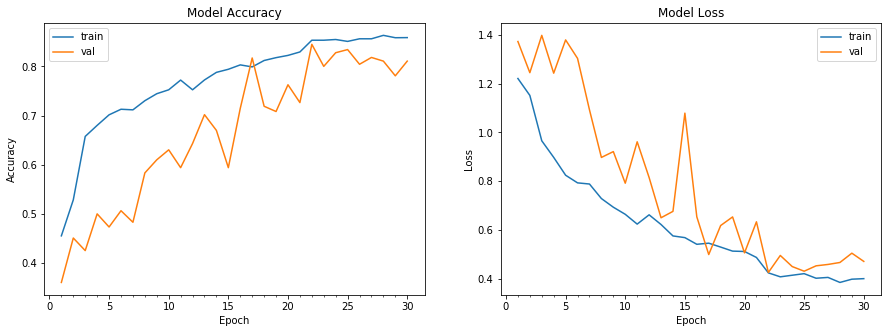

In [46]:
#------------------------
# Save model epoch history
HistoryTraining_Save(history, Model_Name)
#------------------------
# PLOT MODEL HISTORY
plot_model_history(history)

In [47]:
#---------------
# Reload the weights that yielded the best validation accuracy
model.load_weights(Model_Name)

In [50]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image     
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
from keras.preprocessing import image 
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

def Classification_ROC_Report(X,Y,model):
    """
    Plot Classification report | Confusion Matrix | ROC Curve
    Input Data : X,Y,model --> Preprocessed images, Target label, model
    """ 
    
    # Plot Classification report, Confustion Matrix, ROC
    labels = {0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}

    # get predictions on the test set
    y_hat = model.predict(X)
    #
    Y_pred_classes = np.argmax(y_hat,axis = 1) 
    Y_true = np.argmax(Y,axis = 1)

    # Classification report
    ax=plt.figure(figsize=(15,5))
    ax = plt.subplot(1,3,1)
    rpt = sklearn.metrics.classification_report(np.argmax(Y, axis=1), np.argmax(y_hat, axis=1), target_names=list(labels.values()))
    ax.axis('off')
    ax.annotate(rpt, 
                 xy = (1.0,0.5), 
                 xytext = (0, 0), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=13, ha='right', va='center')  

    # Plot confusion matrix
    cm_df = Confusion_Matrix(Y,y_hat,labels,normalization=True)
    ax = plt.subplot(1,3,2)
    sns.heatmap(cm_df, annot=True)
    score = model.evaluate(X, Y, verbose=1)
    ax.set_title('Confusion Matrix\nresult: {0:.2f} - loss: {0:.2f}'.format(score[1], score[0]))
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

    # Plot ROC
    lw=2
    n_classes = 4
    fpr, tpr, roc_auc = ROC(Y,y_hat,n_classes)

    # Plot all ROC curves
    ax = plt.subplot(1,3,3)
    ax.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    ax.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', '#4DBD33'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(labels[i], roc_auc[i]))

    ax.plot([0, 1], [0, 1], 'k--', lw=lw)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC')
    ax.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    return 

def Confusion_Matrix(Y,y_hat,labels,normalization=None):
    """
    Generate confusion matrix data frame
    Input Data : Y,y_hat,labels,normalization=None --> Groundthruth target label, Predicted target label, label list, plot data normalization
    Output Data : cm_df --> Confusion Matrix dataframe
    """ 
    #
    # Get prediction
    Y_pred_classes = np.argmax(y_hat,axis = 1) 
    Y_true = np.argmax(Y,axis = 1)

    # Creates a confusion matrix
    cm = confusion_matrix(Y_true, Y_pred_classes) 
    # Normalization parameter
    if normalization:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                         index = labels.values(), 
                         columns = labels.values())

    return cm_df

def ROC(Y,y_hat,n_classes):
    """
    Generate ROC data
    Input Data : Y,y_hat,n_classes --> Groundthruth target label, Predicted target label, number of classes
    Output Data : fpr, tpr, roc_auc --> False Positive Rate, Tur Positive Rate, Area under curve
    """    
    # Compute ROC curve and ROC area for each class
    Y_pred_classes = y_hat
    Y_true = Y
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_true[:, i], Y_pred_classes[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_true.ravel(), Y_pred_classes.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    return fpr, tpr, roc_auc

Normalized confusion matrix
968/968 [==============================] - 32s 33ms/step


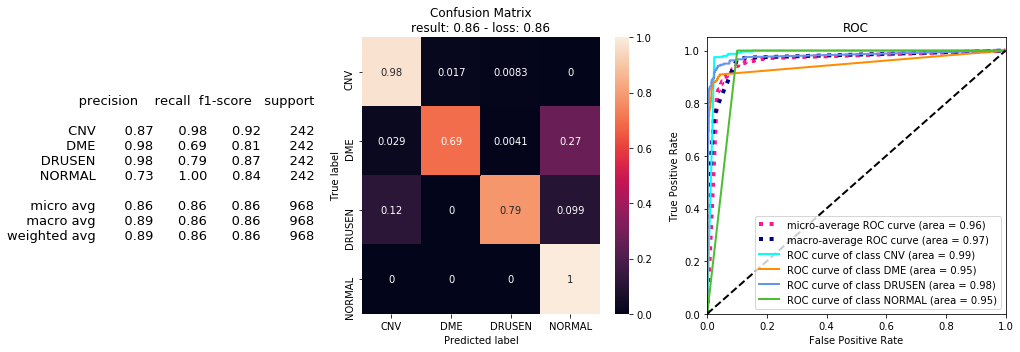

In [51]:
#------------------------
# PLOT MODEL HISTORY
Classification_ROC_Report(X_test_transform, Y_test_transform, model)